# Functional example for LUME-Impact

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

In [3]:
from impact import Impact, run_impact_with_distgen, evaluate_impact_with_distgen

import os

In [4]:
gfile = 'templates/lcls_injector/distgen.yaml'
ifile = 'templates/lcls_injector/ImpactT.yaml'

# Functional run_impact_with_distgen

This is a functional way to apply some settings to and run distgen and impact together.

Any key with a prefix `distgen:` will send its suffix to distgen's Generator.

Otherwise, any key that can be set with Impact's attr syntax can be used.



<Impact with 100 particles, stopping at 0.02 m, at 0x168fbb640>

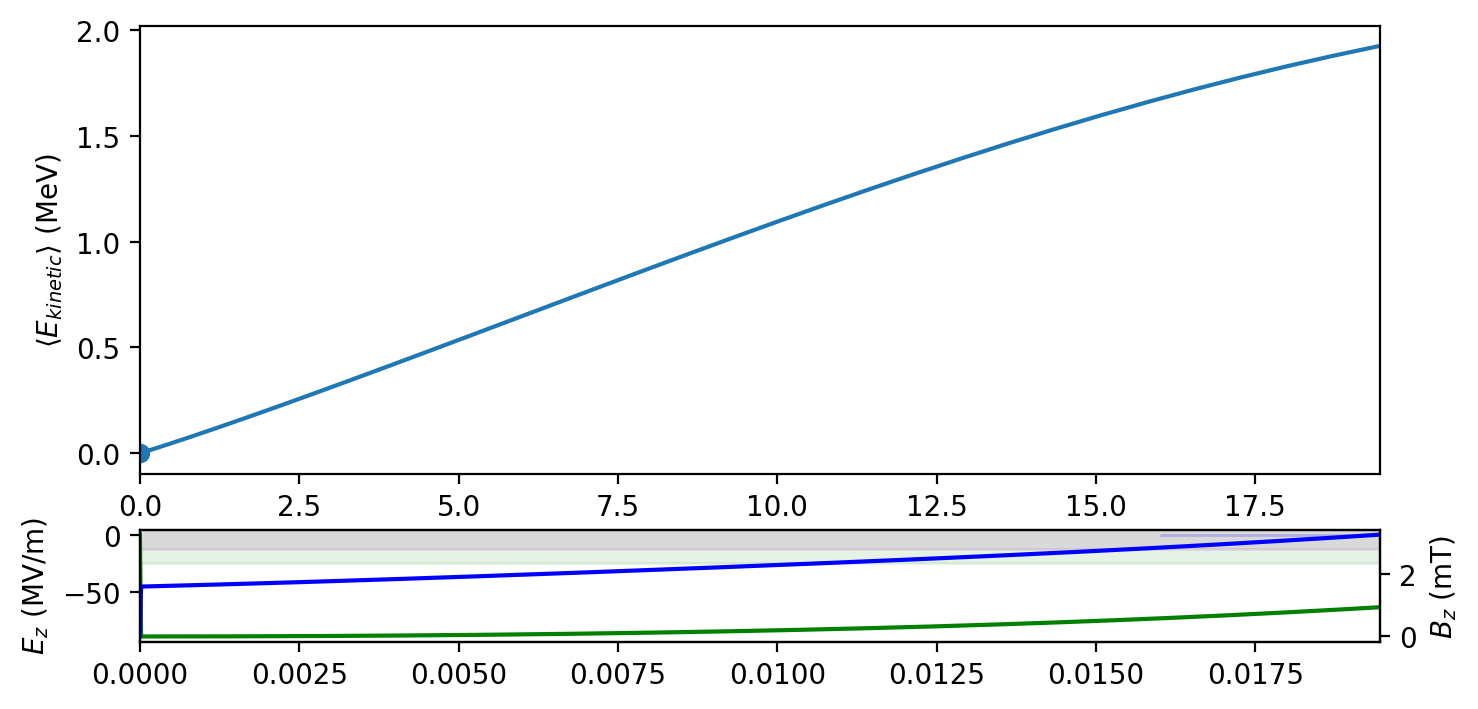

In [5]:
# Make some settings
SETTINGS0 = {
    'distgen:n_particle':100,
    'total_charge':0,  # effectively turns spacecharge off
    'stop':0.02, 
    'total_charge': 0,
    'GUN:theta0_deg':320}


# This returns an Impact object that has run
I = run_impact_with_distgen(
    settings=SETTINGS0,
    distgen_input_file=gfile,
    impact_config=ifile
)

I.plot('mean_kinetic_energy')
I

In [6]:
I['total_charge'] = 1
I.write_input()
!cat {I.path}/ImpactT.in

! Impact-T input file
!Npcol Nprow
1 1
!Dt Ntstep Nbunch
5e-13 1000000 1
!Dim Np Flagmap Flagerr Flagdiag Flagimg Zimage
6 100 1 0 2 1 0.02
!Nx Ny Nz Flagbc Xrad Yrad Perdlen
32 32 32 1 0.015 0.015 45.0
!Flagdist Rstartflg Flagsbstp Nemission Temission
16 0 0 400 5.326350576132463e-12
!sigx(m) sigpx muxpx xscale pxscale xmu1(m) xmu2
0.0006 0.0 0.0 1.0 1.0 0.0 0.0
!sigy(m) sigpy muxpy yscale pyscale ymu1(m) ymu2
0.0006 0.0 0.0 1.0 1.0 0.0 0.0
!sigz(m) sigpz muxpz zscale pzscale zmu1(m) zmu2
1.27e-06 0.0 0.0 1.0 1.0 0.0 0.0
!Bcurr Bkenergy Bmass Bcharge Bfreq Tini
2855999999.9999995 1.0 511005.0 -1.0 2856000000.0 -2.738554468039765e-12
!=================== LATTICE ===================
0 0 0 -4 0.0 0.0 0.25 4e-12 /!name:change_timestep_1
0 0 0 -5 0.0 0.0 -1000.0 /!name:SC_2D_to_3D

!__________________ 1.5 cell gun __________________
! Single particle phased and scaled for 6 MeV energy
0.15 0 0 105 0.0 47537665.059089914 2856000000.0 320 201 0.15 0.0 0.0 0.0 0.0 0.0 0.0 /!name:GUN

!_______

# Functional evaluate_impact_with_distgen

Similar to above, but reuruns a dict of common outputs, and an optinal archive file.

This is useful in optimizations and creating datasets.

In [7]:

# This returns an Impact object that has run
O1 = evaluate_impact_with_distgen(
    SETTINGS0,
    distgen_input_file=gfile,
    impact_config=ifile,
    archive_path = '.'
)

# This is the default output
O1

{'error': False,
 'end_t': 8.0087796e-11,
 'end_mean_z': 0.019454689,
 'end_moment4_x': 0.00030172415,
 'end_moment4_y': 0.00030019947,
 'end_moment4_z': 0.00040716319,
 'end_mean_y': -1.3948043e-08,
 'end_sigma_y': 0.00024655518,
 'end_norm_emit_y': 2.2801592e-07,
 'end_mean_x': -7.768113e-08,
 'end_sigma_x': 0.00024676671,
 'end_norm_emit_x': 2.2925954e-07,
 'end_sigma_z': 0.00033299916,
 'end_norm_emit_z': 3.0544791e-07,
 'end_loadbalance_min_n_particle': 100.0,
 'end_loadbalance_max_n_particle': 100.0,
 'end_n_particle': 100.0,
 'end_moment3_x': 3.9222578e-05,
 'end_moment3_y': 5.060365e-05,
 'end_moment3_z': 0.00037384304,
 'end_mean_gamma': 4.7673063,
 'end_mean_beta': 0.97775246,
 'end_max_r': 0.00053196581,
 'end_sigma_gamma': 0.046487813,
 'end_max_amplitude_x': 0.00052424432,
 'end_max_amplitude_y': 0.00050349191,
 'end_max_amplitude_z': 0.00080116889,
 'end_moment4_px': 6199.692205880249,
 'end_moment4_py': 6159.858815729849,
 'end_moment4_pz': 29761.54923500605,
 'end_mean_

In [8]:
I2 = Impact.from_archive(O1['archive'])

In [9]:
I2.fingerprint() == I.fingerprint()

False

A custom merit function can be provided to give different output. Note that the fingerprint is always returned.

In [10]:
# Custom merit function
def my_merit(impact_object):
    """
    Custom merit function.
    
    Returns the maximum sigma_x seen
    
    """
    d = {'max_sigma_x': I.stat('sigma_x').max()}
    
    return d


evaluate_impact_with_distgen(
    SETTINGS0,
    distgen_input_file=gfile,
    impact_config=ifile,
    merit_f = my_merit
)

{'max_sigma_x': 0.00026436503,
 'fingerprint': '57ba472bab2947b311e8e95866d78bdb'}

In [11]:
# Cleanup
os.remove(O1['archive'])